Импорт библиотек

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Всего датасет содержит 159 записей. Мы предварительно зарезервировали часть датасета для задания по преодолению бейслайна (baseline). В настоящем задании подразумевается работа с датасетом, содержащим 119 записей.

# 0. Применение полиномиальной регрессии для предсказания непрерывного параметра

Представленный набор данных — это набор данных о семи различных типах рыб, продаваемых в некоторой рыбной лавке. Наша цель заключается в том, чтобы предсказать массу рыбы по каким-то косвенным признакам, известным о рыбе. Сами признаки, быть может, нужно синтезировать из тех, что известны.

При помощи <code>train_test_split()</code> разбейте набор данных на обучающую и тестовую выборки с параметрами, указанными в вашем задании. Используйте стратификацию по колонке <code>Species</code>. Стратификация позволит сохранить доли представленных объектов (по представителям типов рыб) в тренировочной и тестовой выборках.

In [24]:

import pandas as pd
from sklearn.model_selection import train_test_split

# Чтение данных (предполагается, что файл называется 'fish_data.csv')
data = pd.read_csv('fish_train.csv')

# Разделение данных на признаки и целевую переменную
X = data.drop(columns=['Weight'])  # Замените 'Weight' на название колонки с массой рыбы
y = data['Weight']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=11, stratify=data['Species']
)

# Выводим размеры выборок для проверки
print(f"Размер обучающей выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")


Обучающая выборка:
Species
Perch        0.357895
Bream        0.221053
Roach        0.126316
Pike         0.105263
Smelt        0.084211
Parkki       0.063158
Whitefish    0.042105
Name: proportion, dtype: float64

Тестовая выборка:
Species
Perch        0.333333
Bream        0.208333
Roach        0.125000
Pike         0.125000
Smelt        0.083333
Parkki       0.083333
Whitefish    0.041667
Name: proportion, dtype: float64


Вычислите выборочное среднее колонки <code>Width</code> полученной тренировочной выборки.

In [20]:

import pandas as pd
from sklearn.model_selection import train_test_split

# Загрузка данных (предполагается, что данные находятся в файле 'fish_data.csv')
data = pd.read_csv('fish_train.csv')

# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop(columns=['Weight'])  # Признаки (все колонки, кроме 'Weight')
y = data['Weight']  # Целевая переменная (масса рыбы)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, stratify=data['Species'])

# Вычисление выборочного среднего колонки Width из тренировочной выборки
mean_width = X_train['Width'].mean()

# Вывод размеров полученных выборок и выборочного среднего
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')
print(f'Выборочное среднее значения Width в тренировочной выборке: {mean_width}')


Размер обучающей выборки: 95
Размер тестовой выборки: 24
Выборочное среднее значения Width в тренировочной выборке: 4.498425263157893


# 1. Построение базовой модели

Избавьтесь от категориальных признаков и обучите модель линейной регрессии (<code>LinearRegression()</code>) на тренировочном наборе данных. Выполните предсказания для тестового набора данных. Оцените модель при помощи метрики <code>r2_score()</code>.

In [21]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Загрузка данных (предполагается, что данные находятся в файле 'fish_data.csv')
data = pd.read_csv('fish_train.csv')

# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop(columns=['Weight'])  # Признаки (все колонки, кроме 'Weight')
y = data['Weight']  # Целевая переменная (масса рыбы)

# Удаление категориальных признаков
X = X.select_dtypes(exclude=['object'])  # Оставляем только числовые признаки

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, stratify=data['Species'])

# Вычисление выборочного среднего колонки Width из тренировочной выборки
mean_width = X_train['Width'].mean()

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Выполнение предсказаний для тестового набора данных
y_pred = model.predict(X_test)

# Оценка модели с использованием r2_score
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')
print(f'Выборочное среднее значения Width в тренировочной выборке: {mean_width}')
print(f'Коэффициент детерминации (r^2): {r2}')

Размер обучающей выборки: 95
Размер тестовой выборки: 24
Выборочное среднее значения Width в тренировочной выборке: 4.498425263157893
Коэффициент детерминации (r^2): 0.8244231342772974


# 2. Добавление предварительной обработки признаков.

## Использование PCA

При помощи, например, <code>sns.heatmap()</code>, постройте матрицу корреляций признаков тренировочного набора данных и определите тройку наиболее коррелированных между собой признаков.

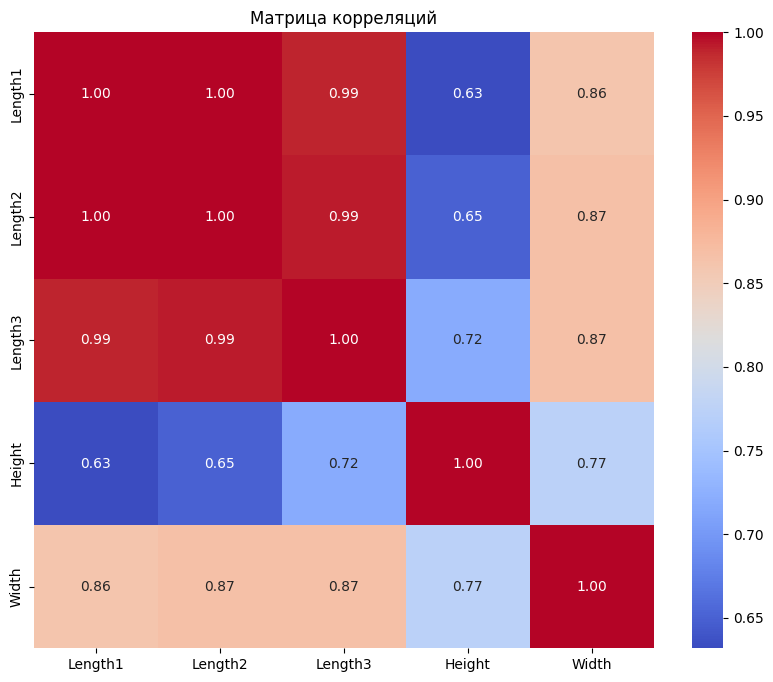

Три наиболее скореллированных признака:
{'Length3', 'Length2', 'Length1'}


In [23]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Загрузка данных (предполагается, что данные находятся в файле 'fish_data.csv')
data = pd.read_csv('fish_train.csv')

# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop(columns=['Weight'])  # Признаки (все колонки, кроме 'Weight')
y = data['Weight']  # Целевая переменная (масса рыбы)

# Удаление категориальных признаков
X = X.select_dtypes(exclude=['object'])  # Оставляем только числовые признаки

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Вычисление выборочного среднего колонки Width из тренировочной выборки
mean_width = X_train['Width'].mean()

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Выполнение предсказаний для тестового набора данных
y_pred = model.predict(X_test)

# Оценка модели с использованием r2_score
r2 = r2_score(y_test, y_pred)

# Построение матрицы корреляций
correlation_matrix = X_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций')
plt.show()

# Определение тройки наиболее скореллированных признаков
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
correlation_pairs = correlation_pairs[correlation_pairs['Feature 1'] != correlation_pairs['Feature 2']]
strongest_correlations = correlation_pairs.sort_values(by='Correlation', ascending=False).head(3)

# Вывод названий трех наиболее коррелированных признаков
most_correlated_features = set(strongest_correlations['Feature 1']).union(set(strongest_correlations['Feature 2']))
print('Три наиболее скореллированных признака:')
print(most_correlated_features)


Линейные модели достаточно плохо реагируют на коррелированные признаки, поэтому от таких признаков имеет смысл избавиться еще до начала обучения.

Для уменьшения количества неинформативных измерений используйте метод главных компонент. 

1) Примените метод главных компонент (<code>PCA(n_components=3, svd_solver='full')</code>) для трех найденных наиболее коррелированных признаков. 

2) Вычислите долю объясненной дисперсии при использовании только первой главной компоненты. 

3) Замените три наиболее коррелированных признака на новый признак <code>Lengths</code>, значения которого совпадают со значениями счетов первой главной компоненты.

In [ ]:
# < ENTER YOUR CODE HERE > 

Примените полученное преобразование для тех же признаков в тестовом наборе данных. Обратите внимание, что заново обучать преобразование `PCA` не нужно. Аналогично предыдущему этапу замените три рассмотренных признака на один.

In [ ]:
# < ENTER YOUR CODE HERE > 

Обучите базовую модель линейной регресси на полученных тренировочных данных, снова выбросив категориальные признаки. Выполните предсказания для тестовых данных, оцените при помощи <code>r2_score()</code>.

In [ ]:
# < ENTER YOUR CODE HERE > 

Видно, что точность значительно не изменилась.

## Модификация признаков

Постройте графики зависимостей признаков от целевой переменной, например, при помощи <code>sns.pairplot()</code>.

In [ ]:
# < ENTER YOUR CODE HERE > 

Видно, что масса, вообще говоря, нелинейно зависит от остальных параметров. Значит, чтобы линейная модель хорошо справлялась с предсказанием, признаки имеет смысл преобразовать так, чтобы зависимость стала более похожей на линейную. Но как придумать такую зависимость?

Логично предположить, что масса рыбы должна каким-то гладким образом зависеть от остальных параметров, отвечающих так или иначе за размеры. Если впомнить, что масса — это произведение плотности на объем, то

$$
m = \rho \cdot V.
$$

Допустим, что средняя плотность у всех рыб одинаковая, и вспомним, что при гомотетии объем объекта зависит от линейных размеров как куб, тогда получим

$$
m\sim V\sim d^3
$$

Все признаки тренировочного и тестового наборов данных, отвечающие так или иначе за размеры (<code>Height, Width, Lengths</code>), возведите в третью степень, и проверьте, стала ли зависимость массы от этих признаков похожа на линейную.

In [ ]:
# < ENTER YOUR CODE HERE > 

Введите выборочное среднее колонки <code>Width</code> тренировочного набора данных после возведения в куб.

In [ ]:
# < ENTER YOUR CODE HERE > 

Выберите изображения, соответствующие зависимости <code>Weight</code> от <code>Width</code> до преобразования и после.

Обучите базовую модель линейной регресси на полученных тренировочных данных, снова выбросив категориальные признаки. Выполните предсказания для тестовых данных, оцените при помощи `r2_score()`.

In [ ]:
# < ENTER YOUR CODE HERE > 

Обратите внимание на то, как такая нехитрая работа с признаками помогла разительно улучшить точность модели!

## Добавление категориальных признаков

Произведите <code>one-hot</code> кодировние категориального признака `Species`, например, с помощью <code>pd.get_dummies()</code>.

Обучите модель линейной регресси на полученных тренировочных данных. Выполните предсказания для тестовых данных, оцените модель при помощи <code>r2_score()</code>.

<b>Примечание</b>: Мы специально использовали стратифицированное разделение, чтобы все значения категориального признака <code>Species</code> присутствовали во всех наборах данных. Но такое возможно не всегда. Про то, как с этим бороться можно почитать, [например, здесь](https://predictivehacks.com/?all-tips=how-to-deal-with-get_dummies-in-train-and-test-dataset).

In [ ]:
# < ENTER YOUR CODE HERE > 

И снова точность возрасла.

Как можно увидеть, после `one-hot` кодирования признаки стали коррелированы. От этого можно избавиться, например, при помощи параметра `drop_first=True`. Заново обучите модель после исправления этого недочета. Выполните предсказания для тестовых данных, оцените модель при помощи <code>r2_score()</code>.

In [ ]:
# < ENTER YOUR CODE HERE > 

На таком сравнительно небольшом наборе данных, впрочем, разницы мы не видим.